Задача номер 2, команда АЗС

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.mixture import GaussianMixture

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()


In [4]:
digits.data.shape

(1797, 64)

Изначально у нас 64 фичи

In [5]:
images = digits.data.reshape(-1, 8, 8)

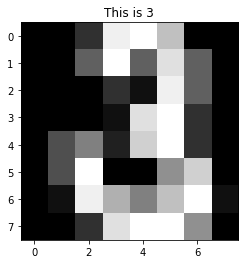

In [6]:
i = 985
plt.imshow(images[i], cmap='gray')
plt.title('This is {}'.format(digits.target[i]))
plt.show()

In [7]:
from sklearn.decomposition import PCA
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
data.shape

(1797, 41)

Новое количество фич - 41, а не 64

Количество компонент получим минимизируя параметр AIC

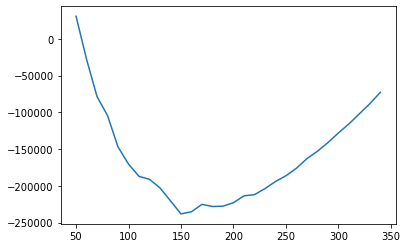

In [8]:
n_components = np.arange(50, 350, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0)
          for n in n_components]
aic = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aic);

Видно, что 150 - оптимальный вариант для количества компонент, так что такую модель и будем строить

In [9]:
gmm = GaussianMixture(110, covariance_type='full', random_state=0)
gmm.fit(data)
print(gmm.converged_)

True


In [10]:
data_new = gmm.sample(100)
data_new[0].shape

(100, 41)

Сгенерировали 100 новых картинок, вернемся обратно к 64 фичам и нарисуем картинки

In [11]:
digits_new = pca.inverse_transform(data_new[0])

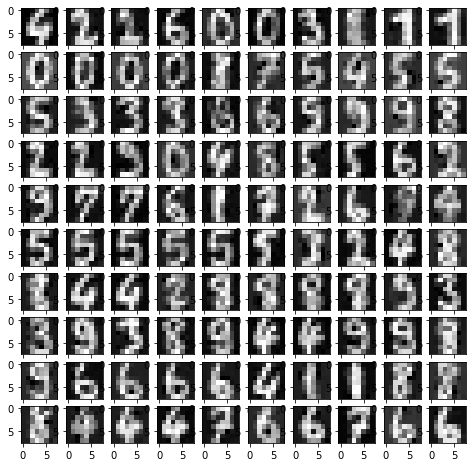

In [12]:
fig, ax = plt.subplots(10, 10, figsize=(8, 8))
for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(digits_new[i].reshape(8, 8), cmap='gray')